In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import mysql.connector
db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "1234",
                             database = "ecommerce")
cur = db.cursor()

In [2]:
"""List of unique cities"""

query = """ select distinct customer_city from customers """
cur.execute(query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

In [3]:
"""Count of orders placed in year 2017"""
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """
cur.execute(query)
data = cur.fetchall()
'total orders placed in 2017 are', data[0][0]

('total orders placed in 2017 are', 180404)

In [4]:
# Total Sales per category
query = ''' select products.product_category category,
round(sum(payments.payment_value),2) sales
from products 
join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
'''
cur.execute(query)
data = cur.fetchall()
data 

[('perfumery', 1520215.98),
 ('Furniture Decoration', 4290529.18),
 ('telephony', 1460646.15),
 ('Fashion Bags and Accessories', 654474.84),
 ('bed table bath', 5137661.01),
 ('automotive', 2556882.99),
 ('computer accessories', 4755991.34),
 ('housewares', 3284274.39),
 ('babies', 1619536.98),
 ('toys', 1857113.07),
 ('Furniture office', 1940479.46),
 ('Cool Stuff', 2339094.0),
 ('HEALTH BEAUTY', 4972119.36),
 ('pet Shop', 933806.91),
 ('General Interest Books', 194084.28),
 ('stationary store', 952320.21),
 ('Watches present', 4287650.04),
 ('PCs', 837364.65),
 ('climatization', 273511.98),
 ('Construction Tools Construction', 724426.89),
 ('sport leisure', 4176382.68),
 ('Bags Accessories', 561453.87),
 ('electronics', 779571.3),
 ('Casa Construcao', 409935.87),
 ('Games consoles', 586441.14),
 ('home appliances', 286596.81),
 ('Garden tools', 2514842.25),
 ('Agro Industria e Comercio', 356191.83),
 (None, 758405.13),
 ('audio', 180973.86),
 ('technical books', 74746.32),
 ('Constru

In [5]:
query = ''' select products.product_category category,
round(sum(payments.payment_value),2) sales
from products 
join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
'''
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Category", "Sales"])
df

,Category,Sales
0,perfumery,1520215.98
1,Furniture Decoration,4290529.18
2,telephony,1460646.15
3,Fashion Bags and Accessories,654474.84
4,bed table bath,5137661.01
...,...,...
69,cds music dvds,3598.29
70,La Cuisine,8740.59
71,Fashion Children's Clothing,2357.01
72,PC Gamer,6523.29


In [6]:
# Percentage of orders that were paid in installments 
query = ''' select sum(case when payment_installments >= 1 then 1
else 0 end)/count(*)*100 from payments
'''
cur.execute(query) 
data = cur.fetchall()
data

[(Decimal('99.9981'),)]

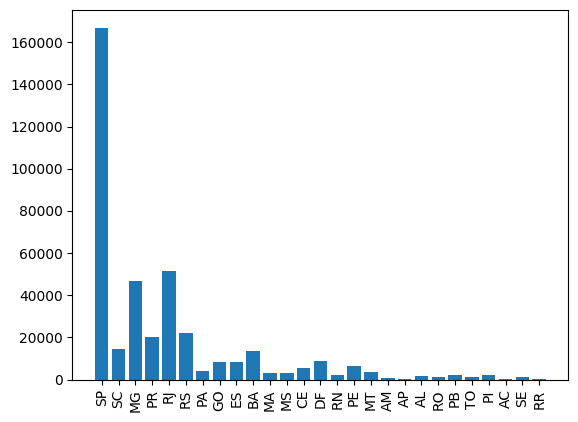

In [7]:
# Customers from each state
query = ''' select customer_state, count(customer_id)
from customers 
group by customer_state
'''
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ['state', 'customer_count'])
plt.bar(df['state'], df['customer_count'])
plt.xticks(rotation = 90)
plt.show()

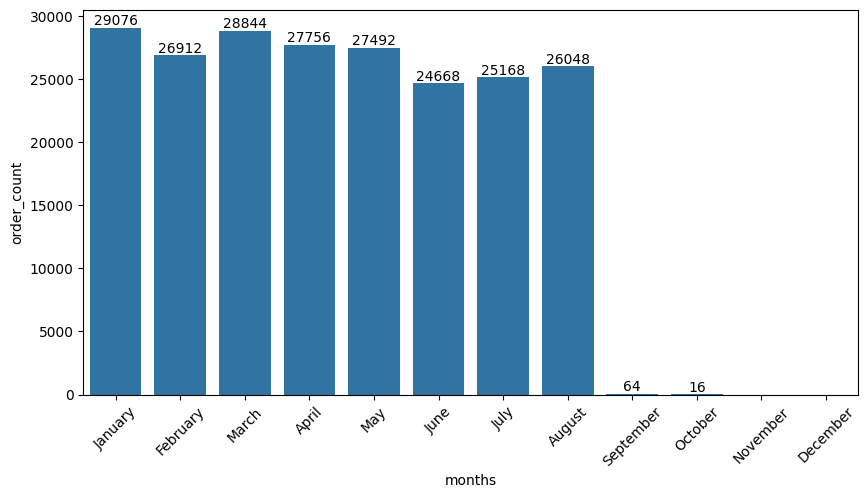

In [8]:
''' Number of orders per month in 2018 '''
plt.figure(figsize = (10,5))
query = ''' select monthname(order_purchase_timestamp) months, count(order_id) oder_coount
from orders
where year(order_purchase_timestamp) = 2018
group by month(order_purchase_timestamp)
'''
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ['months', 'order_count'])
o = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax = sns.barplot(x = df['months'], y = df['order_count'], data= df, order = o)
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.show()

In [9]:
# average number of products per order, grouped by customer city
query = """with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["customer city", "average products/order"])
df.head(10)

,customer city,average products/order
0,padre carvalho,28.00
1,celso ramos,26.00
2,datas,24.00
3,candido godoi,24.00
4,matias olimpio,20.00
5,cidelandia,16.00
6,curralinho,16.00
7,picarra,16.00
8,morro de sao paulo,16.00
9,teixeira soares,16.00


In [10]:
"""the percentage of total revenue contributed by each product category"""
query = """select upper(products.product_category) category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc"""


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "percentage distribution"])
df.head()

,Category,percentage distribution
0,BED TABLE BATH,32.09
1,HEALTH BEAUTY,31.06
2,COMPUTER ACCESSORIES,29.71
3,FURNITURE DECORATION,26.80
4,WATCHES PRESENT,26.78


In [11]:
# Identify the correlation between product price and the number of times a product has been purchased
cur = db.cursor()
query = """select products.product_category, 
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "order_count","price"])

arr1 = df["order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1,arr2])
print("the correlation is", a[0][-1])

the correlation is -0.10631514167157569
